In [89]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request
from adjustText import adjust_text
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [90]:
comunidades={'Andalucía':8426405,
 'Aragón':1320794,
 'Asturias':1022293,
 'Cantabria':581684,
 'Ceuta':84843,
 'Castilla y Leon':2408083,
 'Castilla La Mancha':2035505,
 'Canarias':2207225,
 'Cataluña':7565099,
 'Extremadura':1065371,
 'Galicia':2700330,
 'Baleares':1187802,
 'Murcia':1487698,
 'Madrid':6640705,
 'Melilla':84714,
 'Navarra':649966,
 'País Vasco':2178048,
 'La Rioja':313582,
 'C. Valenciana':4974475}

In [91]:
pob_spain=0
for i in comunidades.keys():
    pob_spain+=comunidades[i]
comunidades['España']=pob_spain

In [92]:
datos_row = pd.read_csv('csv/estado_vacunacion_.csv')

In [93]:
dia = '2/2/21' # dia del informe

<ipython-input-94-7554b2ef0cba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-94-7554b2ef0cba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']


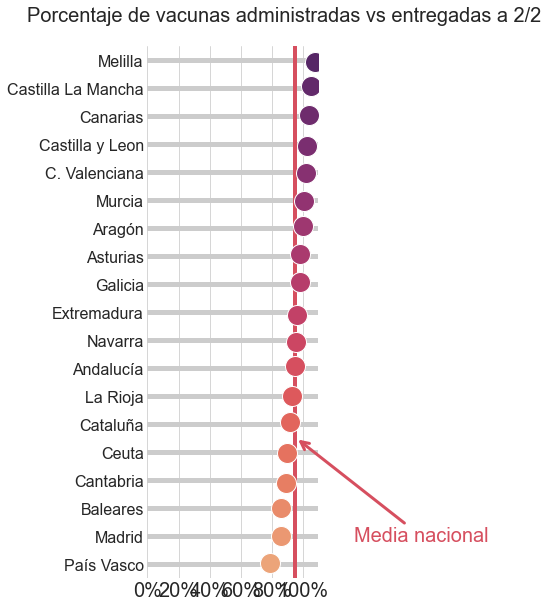

In [94]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Porcentaje de vacunas administradas vs entregadas a {}'.format(dia[:-3])
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']

colores = sns.color_palette("flare_r",19)
media = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()

mas_cercano =  abs(datos['% sobre entregadas']-media).idxmin()
indice_color_media = datos.sort_values('% sobre entregadas',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('% sobre entregadas',ascending=False),
                 x_vars='% sobre entregadas', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      palette=colores,linewidth=1,edgecolor='white')

# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}%'.format(v*100)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
y_min,y_max = ax.get_ylim()

#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=4,color=color_media)
ax.set_xlabel('')
ax.set_ylabel('')
ax.annotate('Media nacional', xy=(media+.01,13.5), va='center', xytext=(media*1.4,17),
            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)
g.fig.suptitle(title,fontsize=20,y=1.05)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

g.fig.savefig('graficos/estado_vacunas_comunidad.png',bbox_inches = 'tight',dpi=144)

<ipython-input-95-5b2c107d3fed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-95-5b2c107d3fed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']


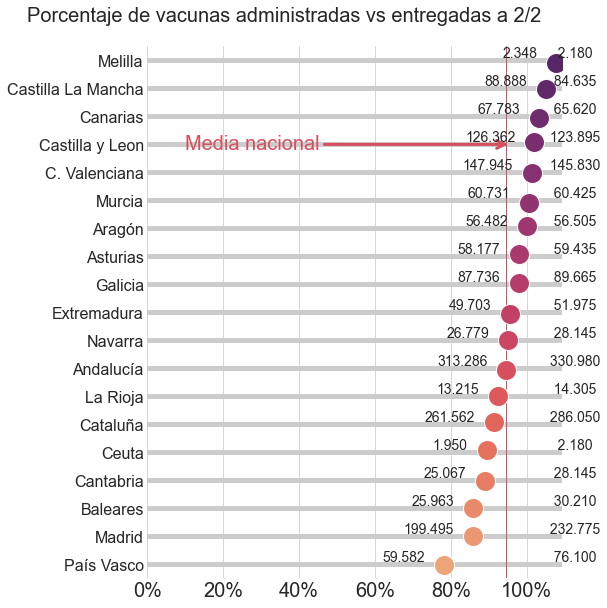

In [95]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Porcentaje de vacunas administradas vs entregadas a {}'.format(dia[:-3])
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']

colores = sns.color_palette("flare_r",19)
media = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()

mas_cercano =  abs(datos['% sobre entregadas']-media).idxmin()
indice_color_media = datos.sort_values('% sobre entregadas',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('% sobre entregadas',ascending=False),
                 x_vars='% sobre entregadas', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      palette=colores,linewidth=1,edgecolor='white')



# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}%'.format(v*100)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('')
ax.set_ylabel('')
ax.annotate('Media nacional', xy=(media+.01,3), va='center', 
            xytext=(0.1,3),
            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=20,y=1.05)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    ax.text(s='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis administradas'].values[0]).replace(',','.'), 
            x=datos.loc[datos['ccaa']==i.get_text(),'% sobre entregadas']-0.05,
            y=i.get_position()[1]-.1,
            horizontalalignment='right',
           fontsize=14)
    ax.text(s='{:>8,d}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis entregadas'].values[0]).replace(',','.'), 
            x=1+.05,
            y=i.get_position()[1]-.1,
            fontsize=14)


g.fig.savefig('graficos/estado_vacunas_comunidad_connumeros.png',bbox_inches = 'tight',dpi=144)

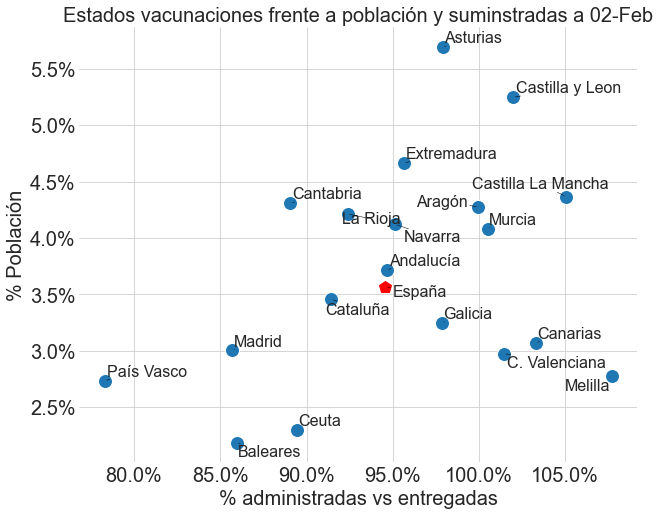

In [96]:
datos = datos_row.copy()

datos=datos.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]

datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']
today=datetime.today().strftime('%d-%b')

admin_entregadas = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()
vacunas_poblacion = datos['Dosis administradas'].sum()/datos['poblacion'].sum()


sns.set_style(style="white")
fig, ax = plt.subplots(figsize=(10, 8))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x='% sobre entregadas', y='vacunas_poblacion',
                data=datos, 
                marker='o', 
                s=200, 
                palette="muted")

ax.yaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))

lista_texto=[]
for i in datos.index:
    texto=plt.text(datos.loc[i,'% sobre entregadas'],
                             datos.loc[i,'vacunas_poblacion'],
                             s=str(datos.loc[i,'ccaa']),
                             ha='center',fontsize=16)
    lista_texto.append(texto)
    
ax.plot(admin_entregadas,vacunas_poblacion, 
                marker='p',markersize=12,color='red')
    
texto=plt.text(admin_entregadas,vacunas_poblacion,
               s='España',ha='center',fontsize=16)
lista_texto.append(texto)   
ax.set_xlabel('% administradas vs entregadas',fontsize=20)
ax.set_ylabel('% Población',fontsize=20)

ax.grid(True)
ax.set_title('Estados vacunaciones frente a población y suminstradas a {}'.format(today),fontsize=20)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
adjust_text(lista_texto,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
fig.savefig('graficos/estado_suministradas_poblacion_{}{}'.format(today,'.png'),dpi=144)
#plt.show()


Ciclos terminados..

<ipython-input-97-226e164f072e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-97-226e164f072e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']


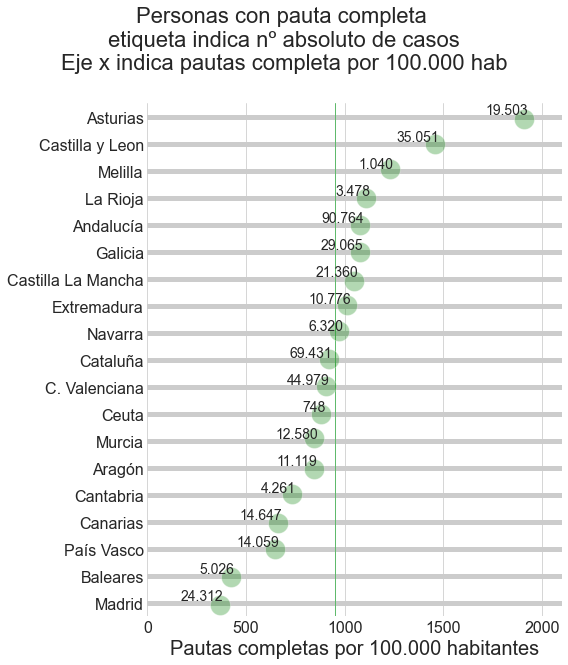

In [97]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Personas con pauta completa \n etiqueta indica nº absoluto de casos \nEje x indica pautas completa por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']

colores = sns.color_palette("Greens_r",19)
media = datos['pauta_poblacion'].mean()
mas_cercano =  abs(datos['pauta_poblacion']-media).idxmin()
indice_color_media = datos.sort_values('pauta_poblacion',ascending=False).index.get_loc(mas_cercano)
color_media = colores[indice_color_media]

g = sns.PairGrid(datos.sort_values('pauta_poblacion',ascending=False),
                 x_vars='pauta_poblacion', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
#g.map(sns.stripplot, size=20, orient="h", jitter=True,
#      palette=colores,linewidth=1,edgecolor='white',alpha=.5)
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      color='green',linewidth=1,edgecolor='white',alpha=.3)


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, datos['pauta_poblacion'].max()*1.1), xlabel="", ylabel="")

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}'.format(v)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticks([0,0.01,0.02,0.02,0.8,1.0])

y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('Pautas completas por 100.000 habitantes',fontsize=20)
ax.set_ylabel('')
#ax.annotate('Media nacional', xy=(media+.01,10), va='center', 
#            xytext=(0.1,10),
#            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
#            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=22,y=1.15)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    valor='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Total pauta completada'].values[0])
    if valor!='0':
        ax.text(s=valor.replace(',','.'), 
                x=datos.loc[datos['ccaa']==i.get_text(),'pauta_poblacion']+20,
                y=i.get_position()[1]-.1,
                horizontalalignment='right',
                fontsize=14)


g.fig.savefig('graficos/estado_pautas_comunidad_{}{}'.format(today,'.png'),bbox_inches = 'tight',dpi=144)

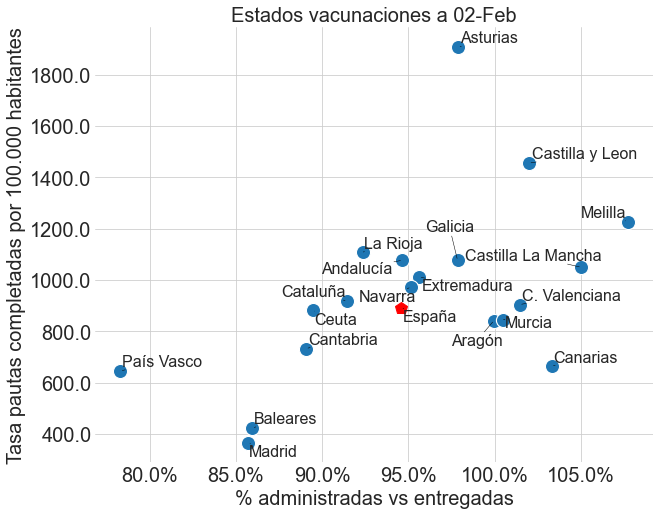

In [98]:
datos = datos_row.copy()

datos=datos.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]

datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=datos['Dosis administradas']/datos['poblacion']
today=datetime.today().strftime('%d-%b')

datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']


admin_entregadas = datos['Dosis administradas'].sum()/datos['Dosis entregadas'].sum()
pauta_espanna = datos['Total pauta completada'].sum()/datos['poblacion'].sum()*100000


sns.set_style(style="white")
fig, ax = plt.subplots(figsize=(10, 8))    
palette = sns.color_palette("bright", 6)
sns.scatterplot(ax=ax, x='% sobre entregadas', y='pauta_poblacion',
                data=datos, 
                marker='o', 
                s=200, 
                palette="muted")

ax.yaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=20,width=0,rotation=0,pad=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1f}'.format(v)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.1%}'.format(v)))

lista_texto=[]
for i in datos.index:
    texto=plt.text(datos.loc[i,'% sobre entregadas'],
                             datos.loc[i,'pauta_poblacion'],
                             s=str(datos.loc[i,'ccaa']),
                             ha='center',fontsize=16)
    lista_texto.append(texto)
    
ax.plot(admin_entregadas,pauta_espanna, 
                marker='p',markersize=12,color='red')
    
texto=plt.text(admin_entregadas,pauta_espanna,
               s='España',ha='center',fontsize=16)
lista_texto.append(texto)   
ax.set_xlabel('% administradas vs entregadas',fontsize=20)
ax.set_ylabel('Tasa pautas completadas por 100.000 habitantes',fontsize=20)

ax.grid(True)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
adjust_text(lista_texto,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))
fig.savefig('graficos/estado_suministradas_poblacion_{}{}'.format(today,'.png'),dpi=144)
#plt.show()


# Vacunas por poblacion

In [99]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,pauta_poblacion
400,2/2/21,Andalucía,324180.0,6800.0,330980,313286,0.946541,90764.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,0.037179,1077.137878
401,2/2/21,Aragón,55305.0,1200.0,56505,56482,0.999593,11119.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,0.042764,841.842104
402,2/2/21,Asturias,58235.0,1200.0,59435,58177,0.978834,19503.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,0.056908,1907.770082
403,2/2/21,Baleares,29610.0,600.0,30210,25963,0.859417,5026.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,0.021858,423.134495
404,2/2/21,Canarias,64320.0,1300.0,65620,67783,1.032963,14647.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,0.030710,663.593426
405,2/2/21,Cantabria,27645.0,500.0,28145,25067,0.890638,4261.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,581684,0.043094,732.528314
406,2/2/21,Castilla y Leon,121395.0,2500.0,123895,126362,1.019912,35051.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2408083,0.052474,1455.556142
407,2/2/21,Castilla La Mancha,82935.0,1700.0,84635,88888,1.050251,21360.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2035505,0.043669,1049.371041
408,2/2/21,Cataluña,280250.0,5800.0,286050,261562,0.914393,69431.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099,0.034575,917.780455
409,2/2/21,C. Valenciana,142930.0,2900.0,145830,147945,1.014503,44979.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475,0.029741,904.195920


<ipython-input-100-70ba37c9912c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-100-70ba37c9912c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
<ipython-input-100-70ba37c9912c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

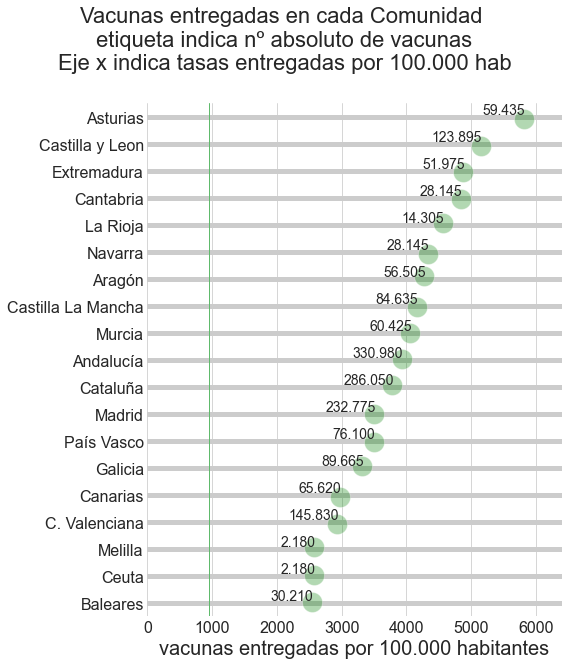

In [100]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']
colores = sns.color_palette("Greens_r",19)

g = sns.PairGrid(datos.sort_values('vacunas_poblacion',ascending=False),
                 x_vars='vacunas_poblacion', y_vars=["ccaa"],
                 height=8, aspect=1)

# Draw a dot plot using the stripplot function
#g.map(sns.stripplot, size=20, orient="h", jitter=True,
#      palette=colores,linewidth=1,edgecolor='white',alpha=.5)
g.map(sns.stripplot, size=20, orient="h", jitter=True,
      color='green',linewidth=1,edgecolor='white',alpha=.3)


# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, datos['vacunas_poblacion'].max()*1.1), xlabel="", ylabel="")

ax = g.axes.flat[0]
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:.0f}'.format(v)))
#ax.set_title(label=title,fontsize=20)
ax.xaxis.grid(True)
ax.yaxis.grid(True,lw=5)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticks([0,0.01,0.02,0.02,0.8,1.0])

y_min,y_max = ax.get_ylim()



#ax.vlines(media,y_min,y_max*.7,color='navy')
ax.axvline(x=media,lw=1,color=color_media)
ax.set_xlabel('vacunas entregadas por 100.000 habitantes',fontsize=20)
ax.set_ylabel('')
#ax.annotate('Media nacional', xy=(media+.01,10), va='center', 
#            xytext=(0.1,10),
#            arrowprops=dict(arrowstyle="->",color=color_media,lw=3),
#            fontsize=20,color=color_media)
#ax.set_title(label=title,fontsize=20)


g.fig.suptitle(title,fontsize=22,y=1.15)
sns.despine(left=True, bottom=True)

#g.fig.subplots_adjust(top=1,bottom=.05) 
g.fig.tight_layout()

ticks_y = ax.get_yticklabels()
for j,i in enumerate(ticks_y):
    #print (i,j.get_position()[0],j.get_position()[1])
    valor='{:,.0f}'.format(datos.loc[datos['ccaa']==i.get_text(),'Dosis entregadas'].values[0])
    if valor!='0':
        ax.text(s=valor.replace(',','.'), 
                x=datos.loc[datos['ccaa']==i.get_text(),'vacunas_poblacion']+20,
                y=i.get_position()[1]-.1,
                horizontalalignment='right',
                fontsize=14)


g.fig.savefig('graficos/entregadas_poblacion_{}{}'.format(today,'.png'),bbox_inches = 'tight',dpi=144)

In [101]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,pauta_poblacion
400,2/2/21,Andalucía,324180.0,6800.0,330980,313286,0.946541,90764.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,8426405,3927.890957,1077.137878
401,2/2/21,Aragón,55305.0,1200.0,56505,56482,0.999593,11119.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1320794,4278.108471,841.842104
402,2/2/21,Asturias,58235.0,1200.0,59435,58177,0.978834,19503.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1022293,5813.890930,1907.770082
403,2/2/21,Baleares,29610.0,600.0,30210,25963,0.859417,5026.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802,2543.353185,423.134495
404,2/2/21,Canarias,64320.0,1300.0,65620,67783,1.032963,14647.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225,2972.963789,663.593426
405,2/2/21,Cantabria,27645.0,500.0,28145,25067,0.890638,4261.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,581684,4838.537763,732.528314
406,2/2/21,Castilla y Leon,121395.0,2500.0,123895,126362,1.019912,35051.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2408083,5144.963857,1455.556142
407,2/2/21,Castilla La Mancha,82935.0,1700.0,84635,88888,1.050251,21360.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2035505,4157.936237,1049.371041
408,2/2/21,Cataluña,280250.0,5800.0,286050,261562,0.914393,69431.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099,3781.179863,917.780455
409,2/2/21,C. Valenciana,142930.0,2900.0,145830,147945,1.014503,44979.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475,2931.565643,904.195920


<ipython-input-102-17c37c66134a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
<ipython-input-102-17c37c66134a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
<ipython-input-102-17c37c66134a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

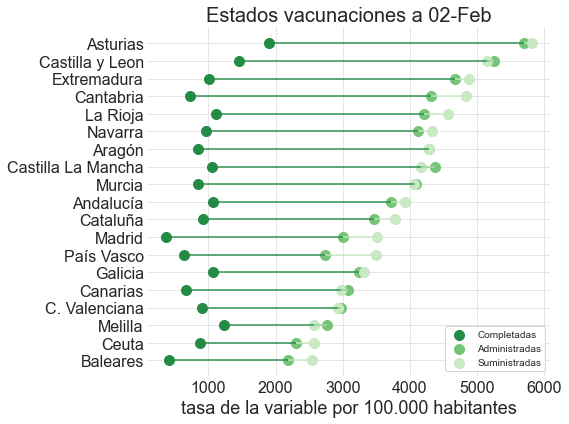

In [102]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos=datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos['poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos['vacunas_poblacion']=100000*datos['Dosis entregadas']/datos['poblacion']
datos['tasa_administradas']=100000*datos['Dosis administradas']/datos['poblacion']
datos['pauta_poblacion']=100000*datos['Total pauta completada']/datos['poblacion']
datos=datos.sort_values('vacunas_poblacion')

colores = sns.color_palette("Greens_r",3)


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(8, 6))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=colores[2],linewidth=2, alpha=0.7)
ax.scatter(datos['pauta_poblacion'], my_range, color=colores[0], alpha=1 ,s=100, label='Completadas')
ax.scatter(datos['tasa_administradas'], my_range, color=colores[1], alpha=1 ,s=100, label='Administradas')
ax.scatter(datos['vacunas_poblacion'], my_range, color=colores[2], alpha=1, s=100,label='Suministradas')


ax.legend()
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
ax.set_xlabel('tasa de la variable por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
f.tight_layout()
f.savefig('graficos/suministrada_admin_pauta.png',dpi=100)


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


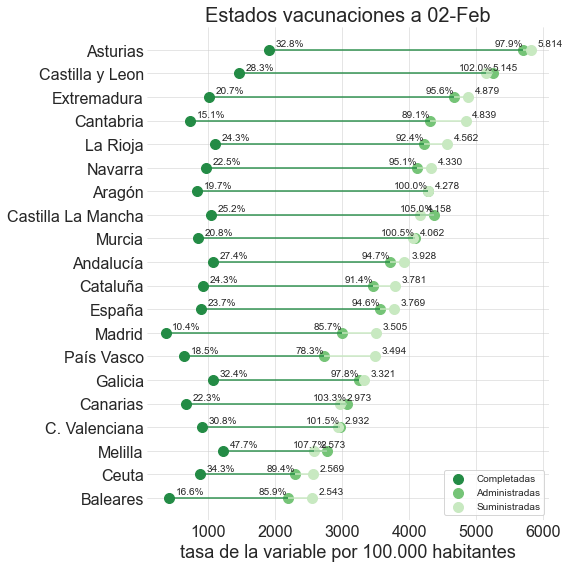

In [103]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title = 'Nº de personas con pauta completa a {}\n linea vertical -> media España'.format(dia[:-3])
title= 'Vacunas entregadas en cada Comunidad \n etiqueta indica nº absoluto de vacunas \nEje x indica tasas entregadas por 100.000 hab'
datos = datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos.loc[:,'vacunas_poblacion'] = 100000*datos['Dosis entregadas']/datos['poblacion']
datos.loc[:,'tasa_administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']
datos.loc[:,'pauta_poblacion'] = 100000*datos['Total pauta completada']/datos['poblacion']

poblacion_españa = datos['poblacion'].sum()
administradas_españa = datos['Dosis administradas'].sum()
entregadas_españa = datos['Dosis entregadas'].sum()
pautas_españa = datos['Total pauta completada'].sum()
indice_españa=len(datos.index)+1

datos = datos.append({'ccaa':'España',
                      'vacunas_poblacion' : 100000 * entregadas_españa/poblacion_españa,
                      'tasa_administradas' : 100000 * administradas_españa/poblacion_españa,
                      'pauta_poblacion' : 100000 * pautas_españa/poblacion_españa,
                      'Dosis administradas': administradas_españa,
                      'Total pauta completada' : pautas_españa,
                      'Dosis entregadas' : entregadas_españa},
                      ignore_index = True)

datos=datos.sort_values('vacunas_poblacion').copy()


colores_bolas = sns.color_palette("Greens_r",3)


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(8, 8))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=colores[2],linewidth=2, alpha=0.7)
ax.scatter(datos['pauta_poblacion'], my_range, color=colores_bolas[0], alpha=1 ,s=100, label='Completadas')
ax.scatter(datos['tasa_administradas'], my_range, color=colores_bolas[1], alpha=1 ,s=100, label='Administradas')
ax.scatter(datos['vacunas_poblacion'], my_range, color=colores_bolas[2], alpha=1, s=100,label='Suministradas')

for linea,i in enumerate(datos.index[::]):
    porcentaje_pautas = datos.loc[i,'Total pauta completada']/datos.loc[i,'Dosis entregadas']
    #porcentaje_entregadas = datos.loc[i,'% sobre entregadas']
    porcentaje_entregadas = datos.loc[i,'Dosis administradas']/datos.loc[i,'Dosis entregadas']
    
    ax.text(s='{:0.1%}'.format(porcentaje_pautas).replace(',','.'), 
                x=datos.loc[i,'pauta_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    ax.text(s='{:0.1%}'.format(porcentaje_entregadas).replace(',','.'), 
                x=datos.loc[i,'tasa_administradas'],
                y=linea+1+.15,
                horizontalalignment='right',
                fontsize=10)
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'vacunas_poblacion']).replace(',','.'), 
                x=datos.loc[i,'vacunas_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    


ax.legend()
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.set_title('Estados vacunaciones a {}'.format(today),fontsize=20)
ax.set_xlabel('tasa de la variable por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)
f.tight_layout()
f.savefig('graficos/suministrada_admin_pauta.png',dpi=144)


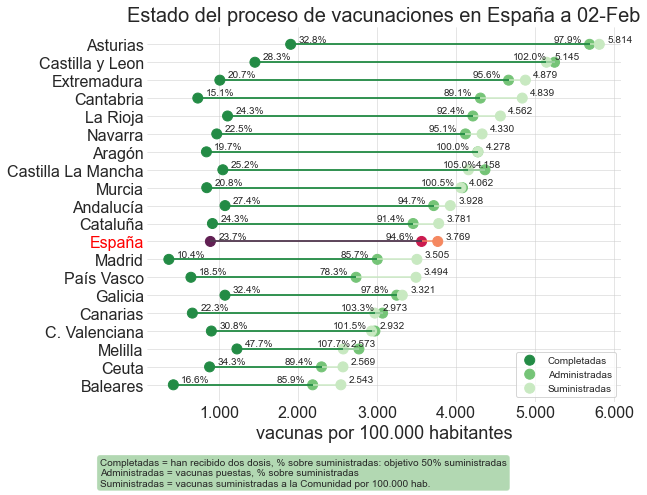

In [104]:

sns.set_style(style="white")
#hoy=datetime.today().strftime('%d/%m')
title= 'Estado del proceso de vacunaciones en España'
datos = datos_row.loc[(datos_row['date_pub']==dia) & (datos_row['ccaa']!='Totales')]
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)
datos.loc[:,'vacunas_poblacion'] = 100000*datos['Dosis entregadas']/datos['poblacion']
datos.loc[:,'tasa_administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']
datos.loc[:,'pauta_poblacion'] = 100000*datos['Total pauta completada']/datos['poblacion']

poblacion_españa = datos['poblacion'].sum()
administradas_españa = datos['Dosis administradas'].sum()
entregadas_españa = datos['Dosis entregadas'].sum()
pautas_españa = datos['Total pauta completada'].sum()
indice_españa=len(datos.index)+1

datos = datos.append({'ccaa':'España',
                      'vacunas_poblacion' : 100000 * entregadas_españa/poblacion_españa,
                      'tasa_administradas' : 100000 * administradas_españa/poblacion_españa,
                      'pauta_poblacion' : 100000 * pautas_españa/poblacion_españa,
                      'Dosis administradas': administradas_españa,
                      'Total pauta completada' : pautas_españa,
                      'Dosis entregadas' : entregadas_españa},
                      ignore_index = True)

datos=datos.sort_values('vacunas_poblacion').copy()


colores_bolas = sns.color_palette("Greens_r",3)
colores_rojos = sns.color_palette('rocket',3)
# c = ['green'  if datos.loc[i,'ccaa']!='España' else 'red' for i in datos.index]


my_range=range(1,len(datos.index)+1)
f, ax = plt.subplots(figsize=(9, 7))

ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=colores[0],linewidth=2, alpha=0.7)


c = [colores_bolas[0]  if datos.loc[i,'ccaa']!='España' else colores_rojos[0] for i in datos.index]
ax.scatter(datos['pauta_poblacion'], my_range, color=c, alpha=1 ,s=100, label='Completadas')
ax.hlines(y=my_range, xmin=datos['pauta_poblacion'], xmax=datos['tasa_administradas'], 
          color=c,linewidth=2, alpha=0.7)
c = [colores_bolas[1]  if datos.loc[i,'ccaa']!='España' else colores_rojos[1] for i in datos.index]
ax.scatter(datos['tasa_administradas'], my_range, color=c, alpha=1 ,s=100, label='Administradas')

c = [colores_bolas[2]  if datos.loc[i,'ccaa']!='España' else colores_rojos[2] for i in datos.index]
ax.hlines(y=my_range, xmin=datos['tasa_administradas'], xmax=datos['vacunas_poblacion'], 
          color=c,linewidth=2, alpha=0.7)
ax.scatter(datos['vacunas_poblacion'], my_range, color=c, alpha=1, s=100,label='Suministradas')

for linea,i in enumerate(datos.index[::]):
    porcentaje_pautas = datos.loc[i,'Total pauta completada']/datos.loc[i,'Dosis entregadas']
    #porcentaje_entregadas = datos.loc[i,'% sobre entregadas']
    porcentaje_entregadas = datos.loc[i,'Dosis administradas']/datos.loc[i,'Dosis entregadas']
    ax.text(s='{:0.1%}'.format(porcentaje_pautas).replace(',','.'), 
                x=datos.loc[i,'pauta_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)
    ax.text(s='{:0.1%}'.format(porcentaje_entregadas).replace(',','.'), 
                x=datos.loc[i,'tasa_administradas']-100,
                y=linea+1+.15,
                horizontalalignment='right',
                fontsize=10)
    ax.text(s='{:0,.0f}'.format(datos.loc[i,'vacunas_poblacion']).replace(',','.'), 
                x=datos.loc[i,'vacunas_poblacion']+100,
                y=linea+1+.15,
                horizontalalignment='left',
                fontsize=10)

datos[datos['ccaa']=='']
ax.get_yticklabels()[datos.index.get_loc(datos[datos['ccaa']=='España'].index.values[0])].set_color("red")


ax.legend(loc=4)
ax.yaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0,color=c)
ax.xaxis.set_tick_params(labelsize=16,width=0,rotation=0,pad=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:'{:,.0f}'.format(v).replace(',','.')))

ax.set_title(title+' a {}'.format(today),fontsize=20)
ax.set_xlabel('vacunas por 100.000 habitantes',fontsize=18)
plt.yticks(my_range,datos['ccaa'])
ax.grid(True,lw=.5)
sns.despine(left=True, bottom=True)
sns.despine(left=True, bottom=True)

textstr = '\n'.join((
    'Completadas = han recibido dos dosis, % sobre suministradas: objetivo 50% suministradas',
     'Administradas = vacunas puestas, % sobre suministradas',
    'Suministradas = vacunas suministradas a la Comunidad por 100.000 hab.',
    ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='green', alpha=0.3)

# place a text box in upper left in axes coords .65, .35
ax.text(-.1, -.15, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)


f.tight_layout()
f.savefig('graficos/suministrada_admin_pauta.png',dpi=144)


In [105]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,tasa_administradas,pauta_poblacion
3,2/2/21,Baleares,29610.0,600.0,30210,25963,0.859417,5026.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802.0,2543.353185,2185.802011,423.134495
17,2/2/21,Ceuta,1980.0,200.0,2180,1950,0.894495,748.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84843.0,2569.451811,2298.362858,881.628420
18,2/2/21,Melilla,1980.0,200.0,2180,2348,1.077064,1040.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84714.0,2573.364497,2771.678825,1227.660127
9,2/2/21,C. Valenciana,142930.0,2900.0,145830,147945,1.014503,44979.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475.0,2931.565643,2974.082692,904.195920
4,2/2/21,Canarias,64320.0,1300.0,65620,67783,1.032963,14647.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225.0,2972.963789,3070.960142,663.593426
11,2/2/21,Galicia,87865.0,1800.0,89665,87736,0.978487,29065.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2700330.0,3320.520085,3249.084371,1076.349928
16,2/2/21,País Vasco,74700.0,1400.0,76100,59582,0.782943,14059.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2178048.0,3493.954220,2735.568729,645.486234
13,2/2/21,Madrid,228075.0,4700.0,232775,199495,0.857029,24312.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,6640705.0,3505.275419,3004.123809,366.105707
19,NaN,España,NaN,NaN,1769055,1673054,NaN,418519.0,NaN,NaN,NaN,NaN,NaN,3769.189832,3564.647863,891.706340
8,2/2/21,Cataluña,280250.0,5800.0,286050,261562,0.914393,69431.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099.0,3781.179863,3457.482843,917.780455


In [106]:
datos

,date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas,Dosis administradas,% sobre entregadas,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,poblacion,vacunas_poblacion,tasa_administradas,pauta_poblacion
3,2/2/21,Baleares,29610.0,600.0,30210,25963,0.859417,5026.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,1187802.0,2543.353185,2185.802011,423.134495
17,2/2/21,Ceuta,1980.0,200.0,2180,1950,0.894495,748.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84843.0,2569.451811,2298.362858,881.628420
18,2/2/21,Melilla,1980.0,200.0,2180,2348,1.077064,1040.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,84714.0,2573.364497,2771.678825,1227.660127
9,2/2/21,C. Valenciana,142930.0,2900.0,145830,147945,1.014503,44979.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,4974475.0,2931.565643,2974.082692,904.195920
4,2/2/21,Canarias,64320.0,1300.0,65620,67783,1.032963,14647.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2207225.0,2972.963789,3070.960142,663.593426
11,2/2/21,Galicia,87865.0,1800.0,89665,87736,0.978487,29065.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2700330.0,3320.520085,3249.084371,1076.349928
16,2/2/21,País Vasco,74700.0,1400.0,76100,59582,0.782943,14059.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,2178048.0,3493.954220,2735.568729,645.486234
13,2/2/21,Madrid,228075.0,4700.0,232775,199495,0.857029,24312.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,6640705.0,3505.275419,3004.123809,366.105707
19,NaN,España,NaN,NaN,1769055,1673054,NaN,418519.0,NaN,NaN,NaN,NaN,NaN,3769.189832,3564.647863,891.706340
8,2/2/21,Cataluña,280250.0,5800.0,286050,261562,0.914393,69431.0,NaN,1/2/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPu...,7565099.0,3781.179863,3457.482843,917.780455


## Dashboard

In [107]:
datos = datos_row.copy()

In [108]:
datos.loc[:,'ccaa'] = datos.apply(lambda x:'España' if x['ccaa']=='Totales' else x['ccaa'] ,axis=1)

In [109]:
datos.loc[:,'poblacion'] = datos.apply(lambda x:comunidades[x['ccaa']],axis=1)

In [110]:
datos.loc[:,'Tasa entregadas'] = 100000*datos['Dosis entregadas']/datos['poblacion']


In [111]:
datos.loc[:,'Tasa administradas'] = 100000*datos['Dosis administradas']/datos['poblacion']


In [112]:
datos.loc[:,'Tasa pautas'] = 100000*datos['Total pauta completada']/datos['poblacion']


In [113]:
datos['date_pub'] = pd.to_datetime(datos['date_pub'],format='%d/%m/%y')

In [114]:
primer_dia = datos['date_pub'][0]
ultimo_dia = list(datos['date_pub'])[-1]

In [115]:
un_dia=timedelta(days=1)

In [116]:
n_dias = (list(datos['date_pub'])[-1]-datos['date_pub'][0]).days

In [117]:
n_dias

29

Vamos a generar una tabla con los siguientes valores para las tres variables suministradas, administradas y pautas completas:
* valores últimas 24 horas
* valores última semana
* media última semana
* valores desde principio
* desde principio

In [118]:
columnas = ['ccaa','poblacion','Dosis entregadas','Tasa entregadas',
         'Dosis administradas','Tasa administradas',
        'Total pauta completada','Tasa pautas']

In [119]:
columns = pd.MultiIndex.from_product([['Entregadas','Administradas','Pautas'],['Hoy','Semana','Total']])

In [120]:
tabla = pd.DataFrame(columns=columns)

In [121]:
for comunidad in datos['ccaa'].unique():
    ayer = ultimo_dia-un_dia if ultimo_dia.dayofweek!=0 else ultimo_dia-3*un_dia
    entregadas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    entregadas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    entregadas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis entregadas'].values[0]
    
    administradas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    administradas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    administradas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Dosis administradas'].values[0]
    
    pautas_hoy = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ayer)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    pautas_semana = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]-datos.loc[(datos['date_pub']==(ultimo_dia-7*un_dia)) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    pautas_total = datos.loc[(datos['date_pub']==ultimo_dia) & (datos['ccaa']==comunidad),'Total pauta completada'].values[0]
    valores=[entregadas_hoy,entregadas_semana,entregadas_total,
        administradas_hoy,administradas_semana,administradas_total,
        pautas_hoy,pautas_semana,pautas_total]
    tabla.loc[comunidad]=valores

In [122]:
tabla

Entregadas                      Administradas            \
                          Hoy    Semana      Total           Hoy    Semana   
Andalucía                 0.0   79560.0   330980.0       13494.0   62114.0   
Aragón                    0.0   14040.0    56505.0        1190.0   12951.0   
Asturias                  0.0   14040.0    59435.0          65.0   14090.0   
Baleares                  0.0    7020.0    30210.0         404.0    3591.0   
Canarias                  0.0   18135.0    65620.0        3308.0   15015.0   
Cantabria                 0.0    7020.0    28145.0        1441.0    4324.0   
Castilla y Leon           0.0   28080.0   123895.0        2137.0   26826.0   
Castilla La Mancha        0.0   21060.0    84635.0        4283.0   24539.0   
Cataluña                  0.0   69030.0   286050.0        5007.0   78849.0   
C. Valenciana             0.0   33930.0   145830.0       11836.0   42455.0   
Extremadura               0.0   11700.0    51975.0        2361.0   14262.0   
Galicia                   0.0   21060.0    89665.0        2018.0   17352.0   
La Rioja                  0.0    2340.0    14305.0        1425.0    3828.0   
Madrid                    0.0   56160.0   232775.0        8552.0   29994.0   
Murcia                    0.0   14040.0    60425.0        1994.0   12079.0   
Navarra                   0.0    7020.0    28145.0        1663.0    8076.0   
País Vasco                0.0   18720.0    76100.0        2320.0   10655.0   
Ceuta                     0.0       0.0     2180.0          60.0     121.0   
Melilla                   0.0       0.0     2180.0         235.0     717.0   
España                    0.0  422955.0  1769055.0       63793.0  381838.0   

                                Pautas                      
                        Total      Hoy    Semana     Total  
Andalucía            313286.0  12124.0   52786.0   90764.0  
Aragón                56482.0    755.0    8174.0   11119.0  
Asturias              58177.0     28.0    8809.0   19503.0  
Baleares              25963.0    244.0    2147.0    5026.0  
Canarias              67783.0   3146.0    9498.0   14647.0  
Cantabria             25067.0   1524.0    3961.0    4261.0  
Castilla y Leon      126362.0    605.0   21806.0   35051.0  
Castilla La Mancha    88888.0   3900.0   17737.0   21360.0  
Cataluña             261562.0   8755.0   59811.0   69431.0  
C. Valenciana        147945.0  11584.0   39586.0   44979.0  
Extremadura           49703.0   2130.0    9055.0   10776.0  
Galicia               87736.0   1967.0   17023.0   29065.0  
La Rioja              13215.0    988.0    3023.0    3478.0  
Madrid               199495.0   8475.0   20239.0   24312.0  
Murcia                60731.0   1287.0    6751.0   12580.0  
Navarra               26779.0   1039.0    4563.0    6320.0  
País Vasco            59582.0   1782.0    8900.0   14059.0  
Ceuta                  1950.0     60.0     245.0     748.0  
Melilla                2348.0    234.0     708.0    1040.0  
España              1673054.0  60627.0  294822.0  418519.0

In [123]:
def colores(x):
    df = tabla.copy()
    df.loc[:,('Entregadas',slice(None))] = 'color : midnightblue'
    df.loc[:,('Administradas',slice(None))] = 'color : darkviolet'
    df.loc[:,('Pautas',slice(None))] = 'color : darkgreen'
    return df

In [124]:

from IPython.display import HTML

def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    dict(selector="th", props=[("font-size", "100%"),
                               ("text-align", "center"),
                               ("color",'black')]),
    dict(selector="caption", props=[("font-size", "200%"),
                                    ("color",'black'),
                                    ("caption-side", "bottom"),
                                    ("text-align", "center")]) ]

estilo_columnas = {
    'Entregadas': [dict(selector='td', props=[('color', 'green')])],
    'Administradas': [dict(selector='td', props=[('color', 'red')])],
    }
html = (tabla.style.set_table_styles(styles)
          .set_properties(**{'color': 'navy',
                           'border-color': 'white'}).format(lambda x: '{:,.0f}'.format(x).replace(',','.')).\
                            set_caption('Valores Vacunación a {} tras {} días de campaña'.format(ultimo_dia.strftime('%d %b'),n_dias)).
        set_table_styles(estilo_columnas,overwrite=False)).apply(colores,axis=None)
html